
A. **Import necessary libraries**

---


In [ ]:
# data manipulation and analysis
import pandas as pd
import numpy as np
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# modules for data splitting and preprocessing
from sklearn.model_selection import train_test_split, learning_curve, TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# machine learning models for regression tasks
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
# metric for evaluating regression model performance
from sklearn.metrics import mean_squared_error
# statistical functions for analysis
from scipy import stats

B. **Exploratory Data Analysis (EDA)**


---




In [ ]:
dataset_path = 'stores_sales.csv'
data = pd.read_csv(dataset_path, usecols=['store', 'date', 'weekly_sales'], index_col='date', parse_dates=True, dayfirst=True)

In [ ]:
data.head()

,store,weekly_sales
date,,
2010-02-05,1,1643690.90
2010-02-12,1,1641957.44
2010-02-19,1,1611968.17
2010-02-26,1,1409727.59
2010-03-05,1,1554806.68


In [ ]:
data.shape

(6435, 2)

In [ ]:
data.dtypes

store             int64
weekly_sales    float64
dtype: object

In [ ]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=True)

store           0.0
weekly_sales    0.0
dtype: float64

In [ ]:
# descriptive statistics
sales_descriptive = data['weekly_sales'].describe()
print("Descriptive Statistics for Weekly Sales:\n")
print(sales_descriptive)

Descriptive Statistics for Weekly Sales:

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: weekly_sales, dtype: float64


# Exploration of the Target Variable

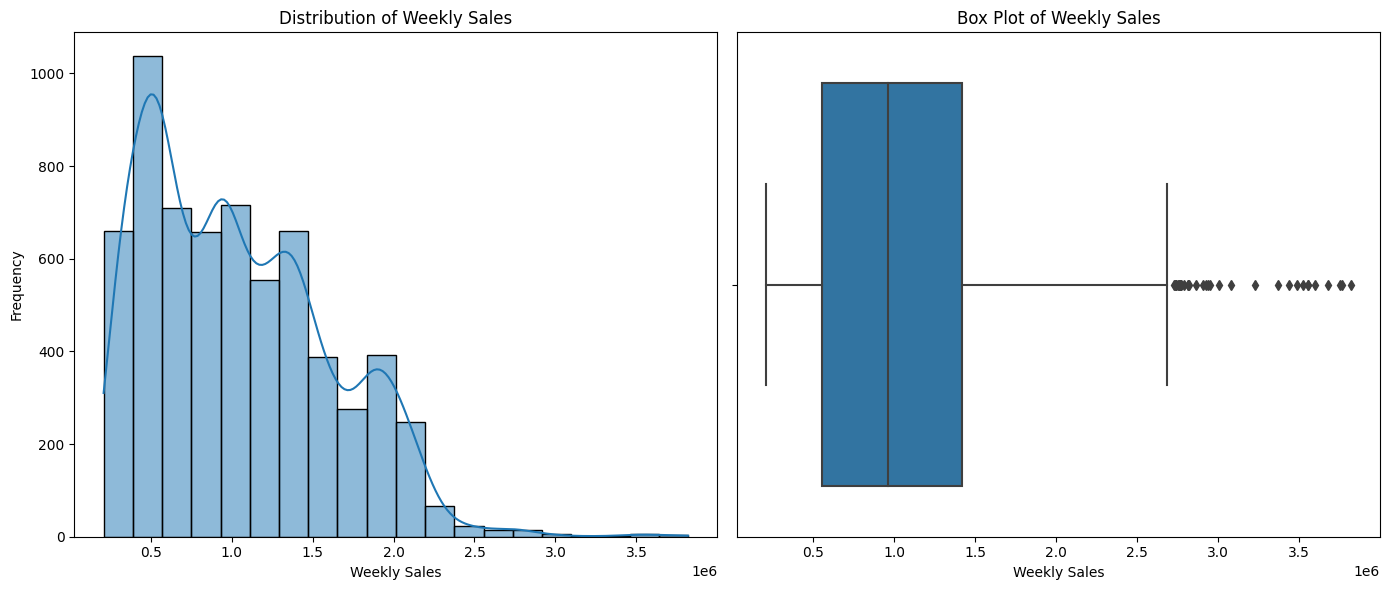

In [ ]:
# figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Plot histogram
sns.histplot(data['weekly_sales'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Weekly Sales")
axes[0].set_xlabel("Weekly Sales")
axes[0].set_ylabel("Frequency")
# Plot box plot
sns.boxplot(x=data['weekly_sales'], ax=axes[1])
axes[1].set_title("Box Plot of Weekly Sales")
axes[1].set_xlabel("Weekly Sales")
# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Calculate z-scores for outlier detection
z_scores = stats.zscore(data['weekly_sales'])
# Define a z-score threshold for identifying outliers
z_score_threshold = 3
# Identify outliers using z-scores
outliers = data[abs(z_scores) > z_score_threshold]

# Print the outliers
print("Outliers:")
print(outliers)

Outliers:
            store  weekly_sales
date                           
2010-12-24      2    3436007.68
2011-12-23      2    3224369.80
2010-11-26      4    2789469.45
2010-12-17      4    2740057.14
2010-12-24      4    3526713.39
2011-11-25      4    3004702.33
2011-12-16      4    2771397.17
2011-12-23      4    3676388.98
2010-11-26     10    2939946.38
2010-12-17     10    2811646.85
2010-12-24     10    3749057.69
2011-11-25     10    2950198.64
2011-12-23     10    3487986.89
2010-11-26     13    2766400.05
2010-12-17     13    2771646.81
2010-12-24     13    3595903.20
2011-11-25     13    2864170.61
2011-12-16     13    2760346.71
2011-12-23     13    3556766.03
2010-11-26     14    2921709.71
2010-12-17     14    2762861.41
2010-12-24     14    3818686.45
2011-12-23     14    3369068.99
2010-11-26     20    2811634.04
2010-12-10     20    2752122.08
2010-12-17     20    2819193.17
2010-12-24     20    3766687.43
2011-11-25     20    2906233.25
2011-12-16     20    2762816.6

# Exploration of the Date-Target relation  


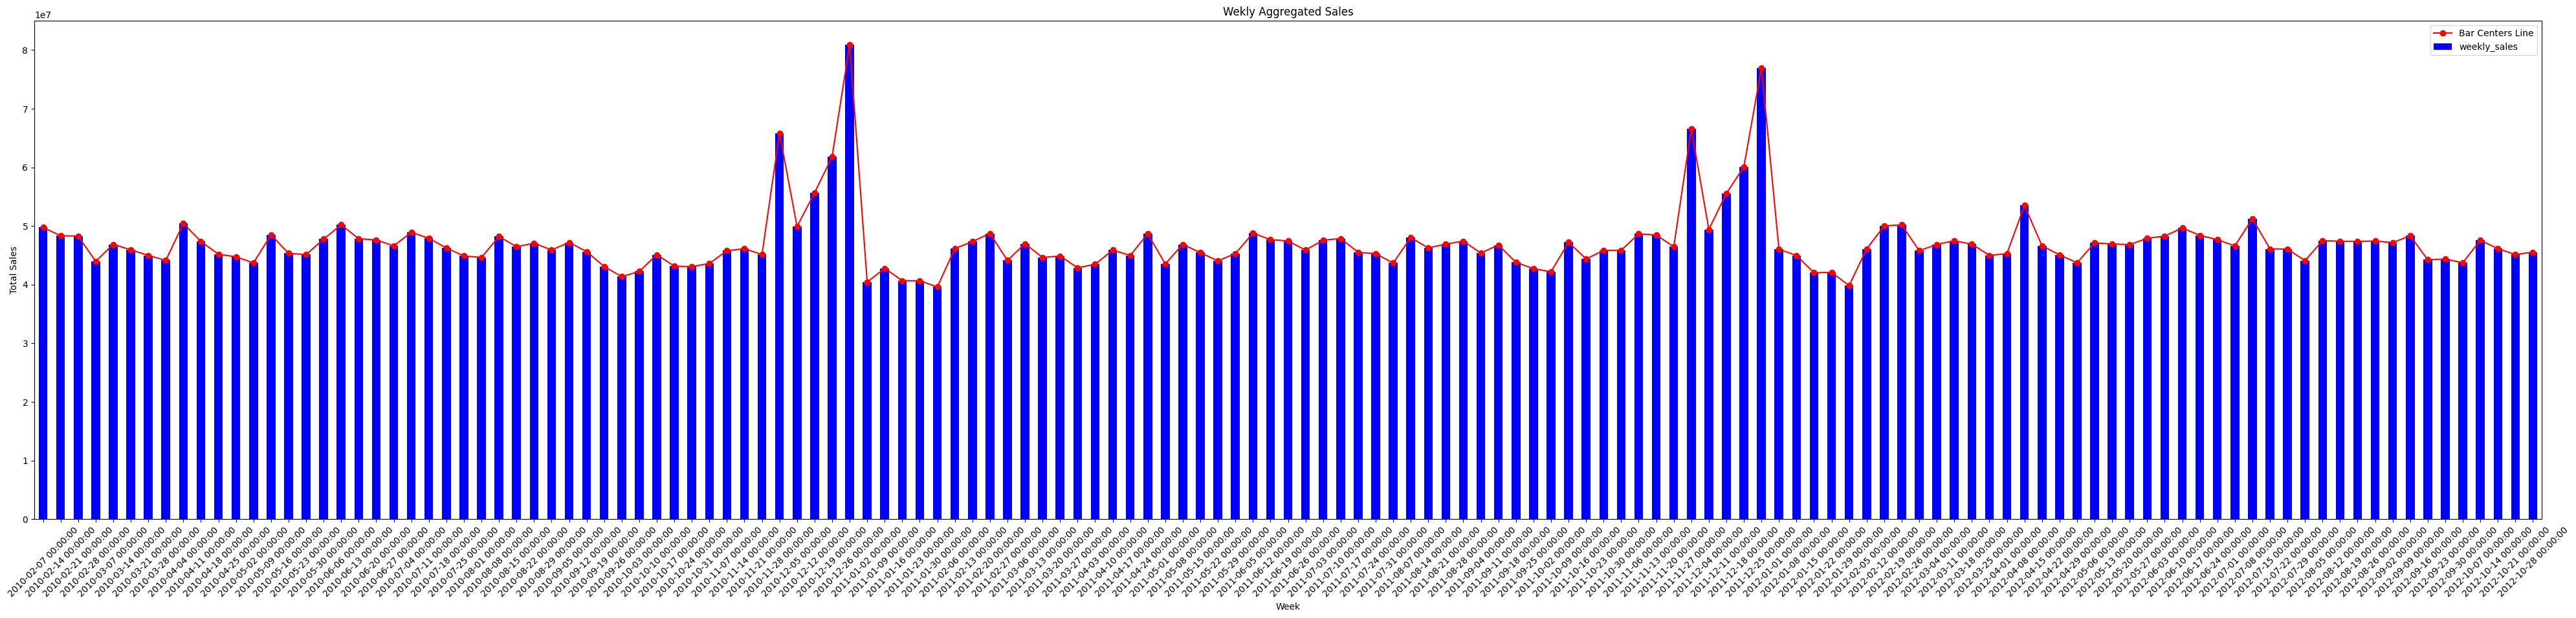

In [ ]:
# Resample data to weekly frequency and sum the weekly sales
weekly_sales = data["weekly_sales"].resample("W").sum()

# figure
figsize = (50, 10)
plt.figure(figsize=figsize)
ax = plt.gca()
bars = weekly_sales.plot(kind='bar', color='blue', ax=ax)
plt.title("Wekly Aggregated Sales")
plt.xlabel("Week")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
# Plot a line using the bar centers
bar_centers = [rect.get_x() + rect.get_width() / 2 for rect in bars.patches]
ax.plot(bar_centers, weekly_sales, marker='o', color='red', linestyle='-', label='Bar Centers Line')
plt.legend()
plt.show()

# Exploration of the Store-Target relation  


In [ ]:
# Correlation between 'store' and 'sales'
store_sales_corr = data['store'].corr(data['weekly_sales'])
print(f"Correlation between Store and Sales: {store_sales_corr}")

Correlation between Store and Sales: -0.33533201479281594


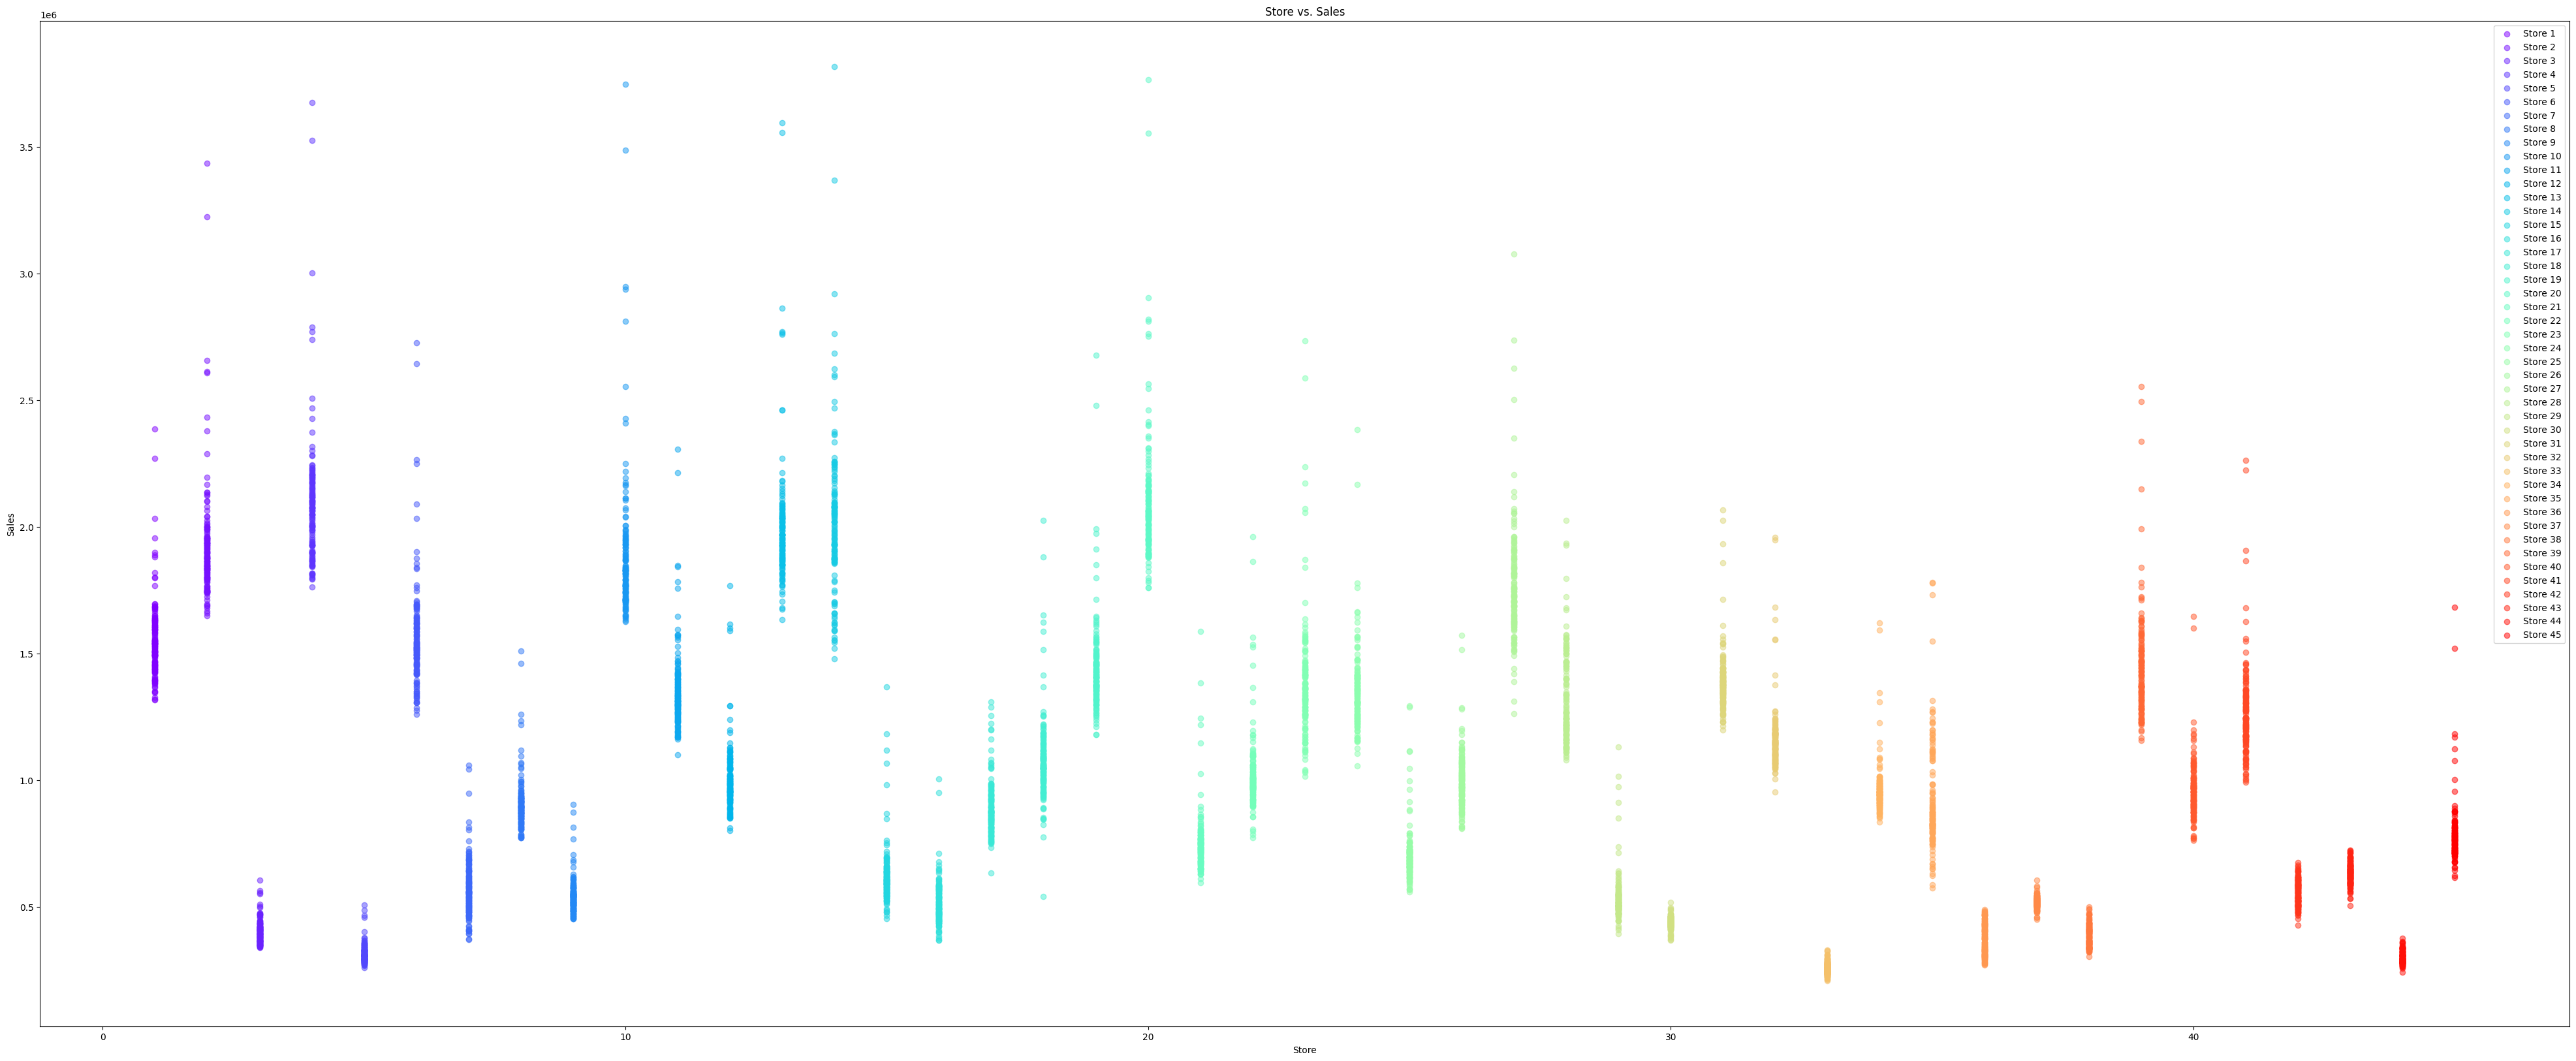

In [ ]:
# Figure
figsize = (50, 20)
# Create a list of unique store numbers
unique_stores = data['store'].unique()
# Generate a range of colors based on the number of unique stores
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_stores)))
# Create the scatter plot
plt.figure(figsize=figsize)
for i, store in enumerate(unique_stores):
    store_data = data[data['store'] == store]
    plt.scatter(store_data['store'], store_data['weekly_sales'], color=colors[i], alpha=0.5, label=f"Store {store}")
plt.title("Store vs. Sales")
plt.xlabel("Store")
plt.ylabel("Sales")
plt.legend()
plt.show()

* *italicized text*C*. **PRE-PROCESSING**


---




In [ ]:
# Encoding
# Nettoyage
# Feature Standardization
# Feature engeneering

In [ ]:
# Create features from the date column
data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day
#data = data.drop(columns=['date'])

In [ ]:
# Split data into features and target
X = data.drop(['weekly_sales'], axis=1)
y = data['weekly_sales']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*D*. **MODELING**


---




In [ ]:
# Define models
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(random_state=0)
gradient_boosting = GradientBoostingRegressor(random_state=0)
adaboost = AdaBoostRegressor(random_state=0)

In [ ]:
# Create a dictionary of models
dict_of_models = {'Linear Regression': linear_reg,
                  'Random Forest Regressor': random_forest,
                  'Gradient Boosting Regressor': gradient_boosting,
                  'AdaBoost Regressor': adaboost
                 }

*E*. **EVALUATION**


---




In [ ]:
# List to store RMSE values for model ranking
rmse_values = []

def evaluation(model):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append((model, rmse))
    # Calculate normalized RMSE to simplify interpretation
    y_range = y.max() - y.min()
    normalized_rmse = rmse / y_range
    print("Model:", model)
    print("Root Mean Squared Error:", rmse)
    print("Normalized Root Mean Squared Error:", normalized_rmse)

    # Figures

    # 1 Learning curve
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                               cv=4, scoring='neg_mean_squared_error',
                                               train_sizes=np.linspace(0.1, 1, 10))
    ax1.plot(N, -train_score.mean(axis=1), label='train score')
    ax1.plot(N, -val_score.mean(axis=1), label='validation score')
    ax1.legend()
    ax1.set_xlabel('Training Size')
    ax1.set_ylabel('Negative Mean Squared Error')
    ax1.set_title('Learning Curve')

    # 2 Continuous line plot for y_test and y_pred
    df = pd.DataFrame(index=X_test.index)
    df['y_test'] = y_test
    df['y_pred'] = y_pred
    Y_test = df["y_test"].resample("W").sum()
    Y_pred = df["y_pred"].resample("W").sum()
    figsize = (10, 6)
    ax = plt.gca()
    ax2.plot(Y_test.index, Y_test, label='y_test', color='blue')
    ax2.plot(Y_pred.index, Y_pred, label='y_pred', color='red')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Values')
    ax2.set_title('y_test vs y_pred')
    ax2.legend()
    plt.tight_layout()
    plt.show()

Linear Regression
Model: LinearRegression()
Root Mean Squared Error: 532326.4432683174
Normalized Root Mean Squared Error: 0.14751196102915873


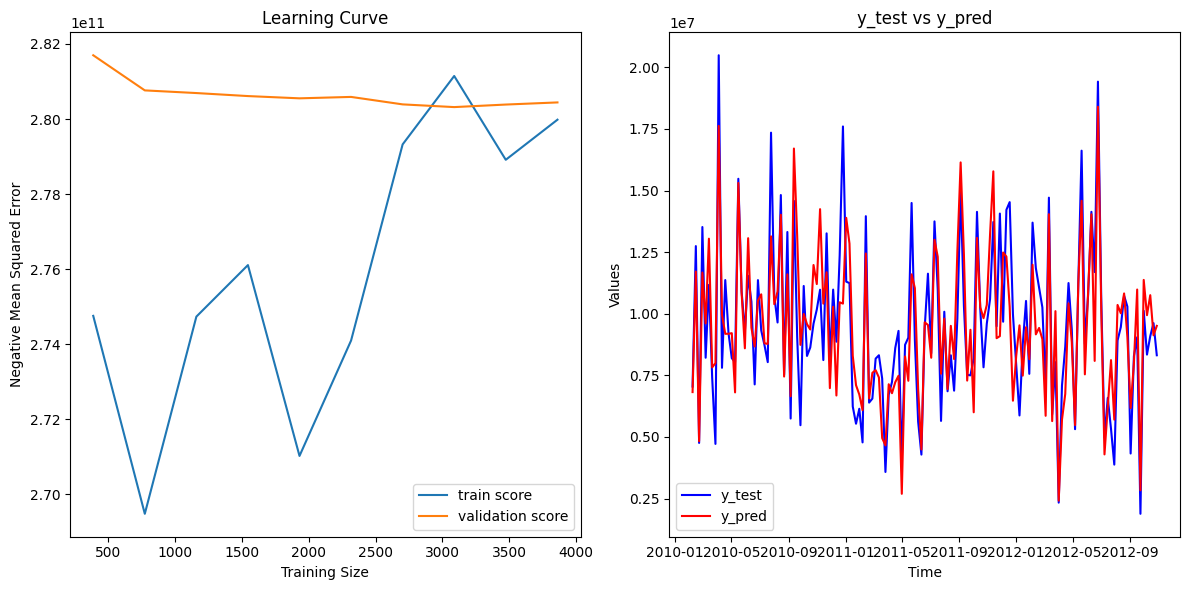

Random Forest Regressor
Model: RandomForestRegressor(random_state=0)
Root Mean Squared Error: 105077.51659653886
Normalized Root Mean Squared Error: 0.029117829349342695


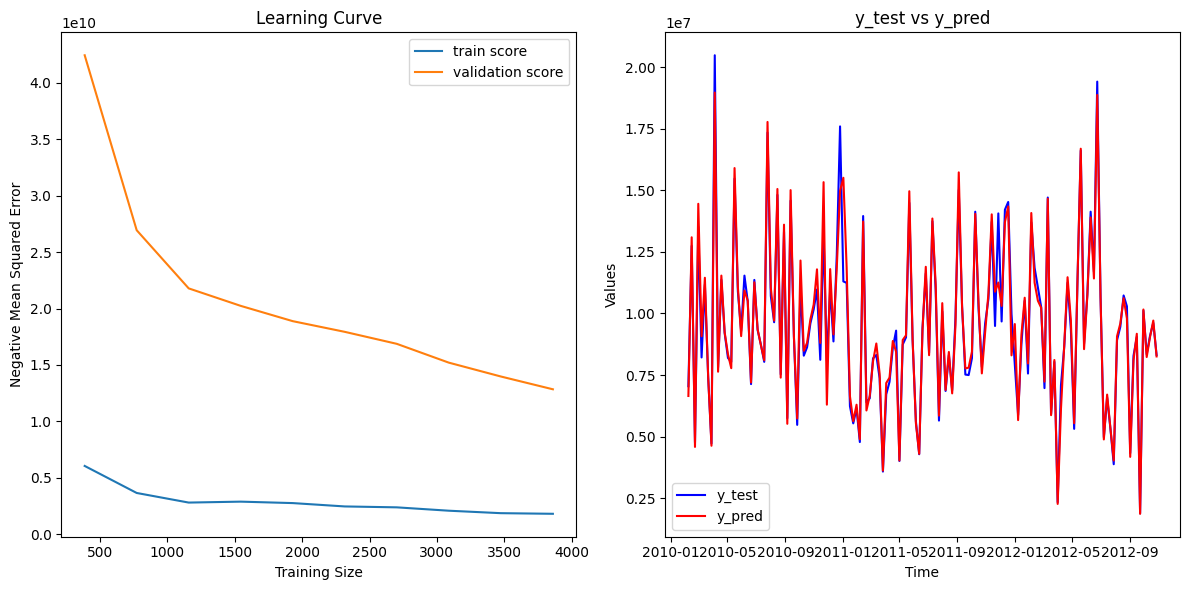

Gradient Boosting Regressor
Model: GradientBoostingRegressor(random_state=0)
Root Mean Squared Error: 183439.9165043594
Normalized Root Mean Squared Error: 0.05083268388556062


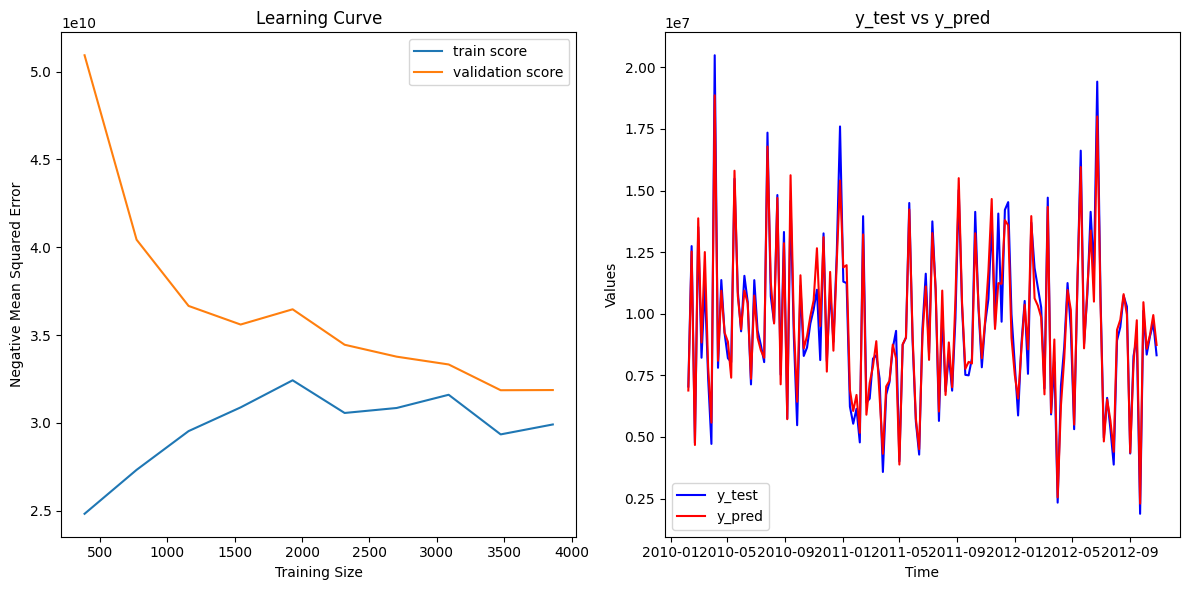

AdaBoost Regressor
Model: AdaBoostRegressor(random_state=0)
Root Mean Squared Error: 483708.69130738574
Normalized Root Mean Squared Error: 0.1340395889099864


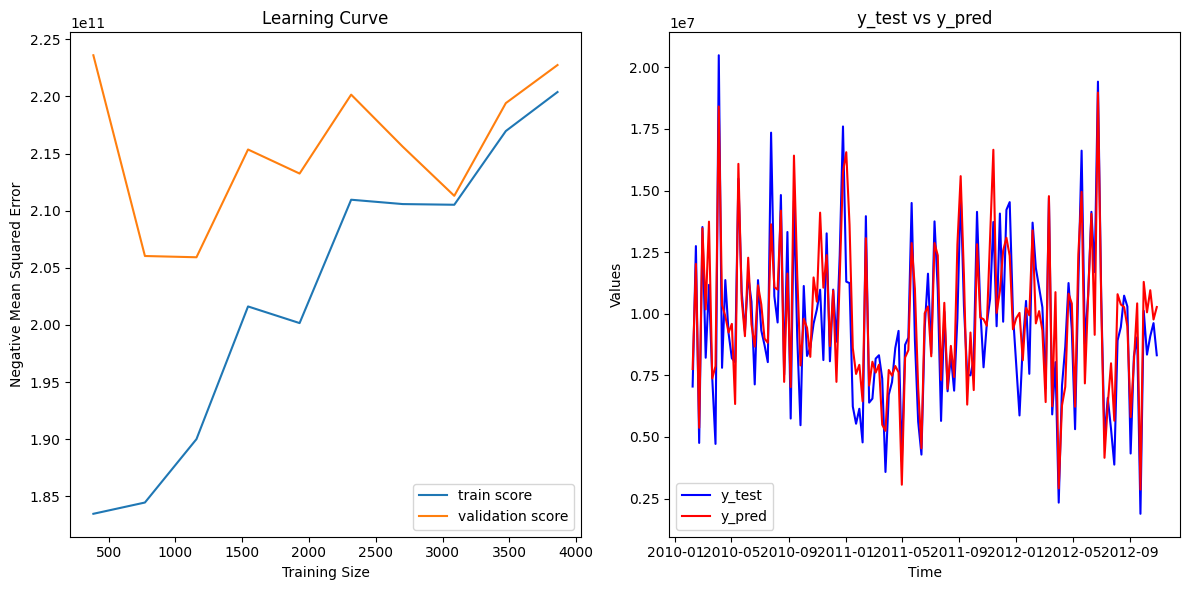

In [ ]:
# Evaluate each model and plot evaluation results
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [ ]:
# Enumerate models from best to worst based on RMSE
rmse_values.sort(key=lambda x: x[1])
print("\nModels Ranked from Best to Worst Based on RMSE:")
for idx, (model, rmse) in enumerate(rmse_values, start=1):
    print(f"{idx}. {model}: RMSE = {rmse:.4f}")


Models Ranked from Best to Worst Based on RMSE:
1. RandomForestRegressor(random_state=0): RMSE = 105077.5166
2. GradientBoostingRegressor(random_state=0): RMSE = 183439.9165
3. AdaBoostRegressor(random_state=0): RMSE = 483708.6913
4. LinearRegression(): RMSE = 532326.4433


*F*. **OPTIMISATION**


---




In [ ]:
dict_of_models['Random Forest Regressor'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

Optimal n_estimators: 665
Minimal RMSE: 106955.53507383294


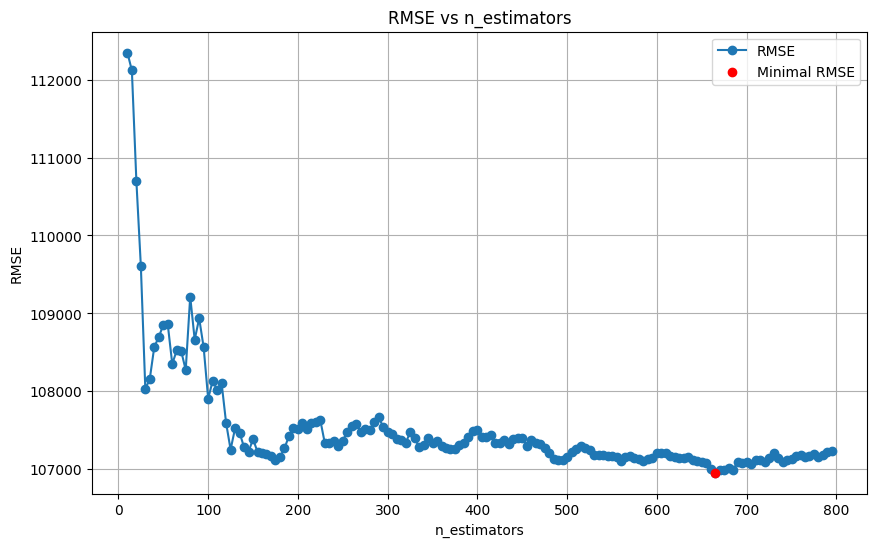

In [ ]:
def evaluationMetrics(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

n_estimators_values = list(range(10, 800, 5))
rmse_values = []

for n_estimators in n_estimators_values:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rmse = evaluationMetrics(model)
    rmse_values.append(rmse)

# Find the index of the minimum RMSE value
min_rmse_index = np.argmin(rmse_values)
optimal_n_estimators = n_estimators_values[min_rmse_index]
minimal_rmse = rmse_values[min_rmse_index]

print(f"Optimal n_estimators: {optimal_n_estimators}")
print(f"Minimal RMSE: {minimal_rmse}")

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, rmse_values, marker='o', label='RMSE')
plt.scatter(optimal_n_estimators, minimal_rmse, color='red', label='Minimal RMSE', zorder=5)
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs n_estimators')
plt.legend()
plt.grid(True)
plt.show()

Model: RandomForestRegressor(n_estimators=155)
Root Mean Squared Error: 107532.36114221098
Normalized Root Mean Squared Error: 0.02979808661916858


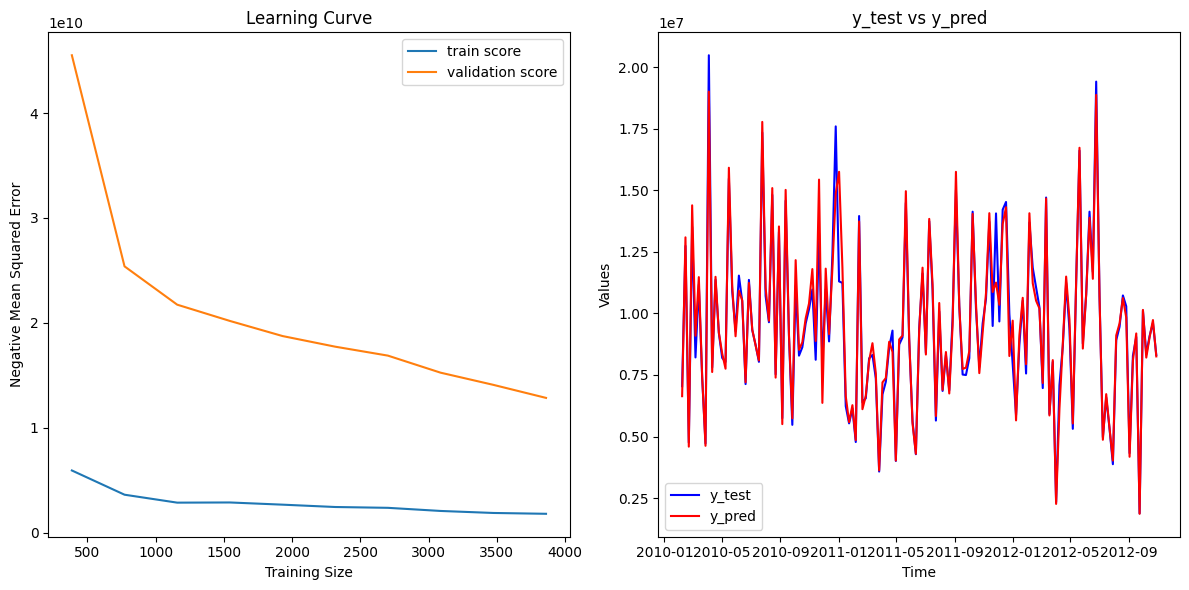

In [ ]:
# GridSeaarchCV
# Set the random seed for reproducibility
np.random.seed(42)
# Define the parameter grid
param_grid = {
    'n_estimators': list(range(10, 200, 5)),
    'min_samples_leaf': [1, 2, 3, 5, 10,20,50]
}
# Random Forest Regressor instance
rf_regressor = RandomForestRegressor()
# Create TimeSeriesSplit instance
tscv = TimeSeriesSplit(n_splits=5)
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=tscv)
grid_search.fit(X_train, y_train)

# Get the best estimator from grid search
best_rf_regressor = grid_search.best_estimator_
# Evaluate the best estimator
evaluation(best_rf_regressor)

G. **BONUS :**


1. **Explain the model you built and why you chose it:**

   Random Forest Regressor:
   
   ML method that combines many decision trees to solve problems like predicting numbers or classifying things. It does this by using a technique called bootstraping and bagging, where it picks random samples from the data, and then each tree only looks at some of the features. This teamwork among the trees helps Random Forest make accurate predictions.

   Since we have supervised machine learning problems that involve predicting continuous values, we can consider using any of the following models:

   Regression models, time series analysis, decision tree-based algorithms like Random Forest and Gradient Boosting, as well as neural networks, notably LSTM.

   After analyzing the results of the Evaluation step, I opted for the Random Forest Regressor due to its good RMSE score. I am familiar with its functionality, it can effectively manage non-linear relationships within the data, handle feature interactions, and mitigate overfitting. Furthermore, it demonstrates relative resilience to outliers.

---

2. **Explain how you would deploy the model in production:**
   
   **A- Model Saving/Serialization:**

   Serialize the trained model into a format that can be easily loaded and used by our deployment environment.
   Common serialization formats include pickle, ONNX, or TensorFlow's SavedModel.

   Saving Scikit-Learn model: `joblib.dump(model, 'model_filename.pkl')`
   
   **B- Deployment:**

   There are many ML deployment tools in the market (TensorFlow Serving, mlflow, BENTOML, Kserve, SELDON...).
   For a basic ML deployment, we can opt for the following approach:
   
   1. Turn our model into an API server:
      Build an API around the model using a web framework. With Python, we can use Flask or potentially FastAPI,
      to have a layer of abstraction that handles incoming requests.
   2. Containerize our web service:
      Create a Docker image out of it to ensure that we can run it on any device and that all the dependencies are available.
   4. Deploy our image in a Kubernetes cluster (not necessary in our case).
   5. Deploy our service into a computational unit:
      Common options include cloud platforms like Amazon Web Services (AWS), Microsoft Azure, Google Cloud Platform (GCP), or deployment services like Heroku.

---

3. **Explain how you would monitor the model in production:**
   - Implement logging and monitoring to track prediction requests, response times, and model performance over time.
   - Use tools to collect and visualize  RMSE meric and set threshold value for it.
   - Configure alerts for metrics and anomalies or drops in performance.

---

4. **Explain how you would retrain the model over time:**

   Use DVC to manage data versioning and ensure reproducibility in the retraining process.
   Implement an Apache Airflow workflow to automate the model retraining process with new data at regular intervals.

---

5. **Explain how you would evaluate the model over time:**

   Track and visualize performance metric and check for any degradation in performance (Prometheus, Grafana, DataDog).

---

6. **Explain how you would improve the model over time:**

   More serious experiments with hyperparameter tuning, feature engineering (try adding lags), and exploring different algorithms.
   Consider using time series analysis.
